# Actor-Critic test of best models

In [2]:
import numpy as np

from IPython.display import clear_output

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import torch
import torch.nn as nn

# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Reproducible results
torch.manual_seed(0)

import gym

from actor_critic import ActorCritic
import os

In [3]:
def sample_one_episode(env: gym.Env, model: ActorCritic):
    state = env.reset()
    done = False

    total_reward = 0

    while not done:
        state = torch.unsqueeze(torch.FloatTensor(state), 0).to(device)
        probability_dist, values = model(state)
        action_to_take = probability_dist.sample()
        next_state, reward, done, _ = env.step(action_to_take.cpu().detach().numpy()[0])
        state = next_state

        total_reward += reward

    return total_reward

In [4]:
# Load
PATH = "results/CartPole-v1/best_model/num_env24-num_episodes100000-learning_rate0.003-hidden_layers128-128.pt"

model_load = torch.load(PATH)
model_load.eval()

model_load.state_dict()

model_load_env = gym.make("CartPole-v1")
state = model_load_env.reset()
model_load_env.seed(0)

[0]

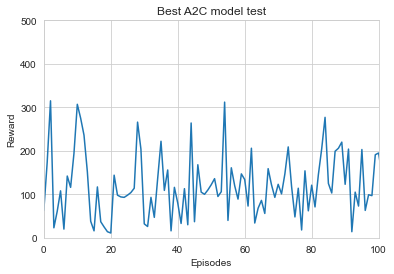

In [16]:
model_load_total_rewards = []

for _ in range(1000):
    model_load_rewards = sample_one_episode(env=model_load_env,model=model_load)
    model_load_total_rewards.append(model_load_rewards)
    
model_load_total_rewards

plt.title(f"Best A2C model test");
plt.xlabel("Episodes");
plt.ylabel("Reward");
plt.ylim([0, 500]);
plt.xlim([0, 100]);
plt.plot(model_load_total_rewards);
plt.savefig("results/CartPole-v1/best_model/best_model_rewards.png", dpi=300, bbox_inches="tight");
plt.show();

In [10]:
min(model_load_total_rewards), max(model_load_total_rewards), np.std(model_load_total_rewards), np.mean(model_load_total_rewards)

(11.0, 500.0, 75.0005541046198, 122.378)